In [1]:
import sys
sys.path
import api
import group
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()["response"]
sep_dict = None
for g in groups:
    if g["name"] == "SEP Actives":
        sep_dict = g
sep = group.Group(sep_dict["id"])
sep

In [28]:
sep.collect_messages()
sep.handle_messages()

In [30]:
def convert_to_name(df, labels, id_to_name):
    for label in labels:
        df[label] = df[label].map(id_to_name)
    return df

In [31]:
id_to_name = sep.id_to_name
messages = convert_to_name(sep.messages, ["sender_id"], id_to_name)
likes = sep.likes


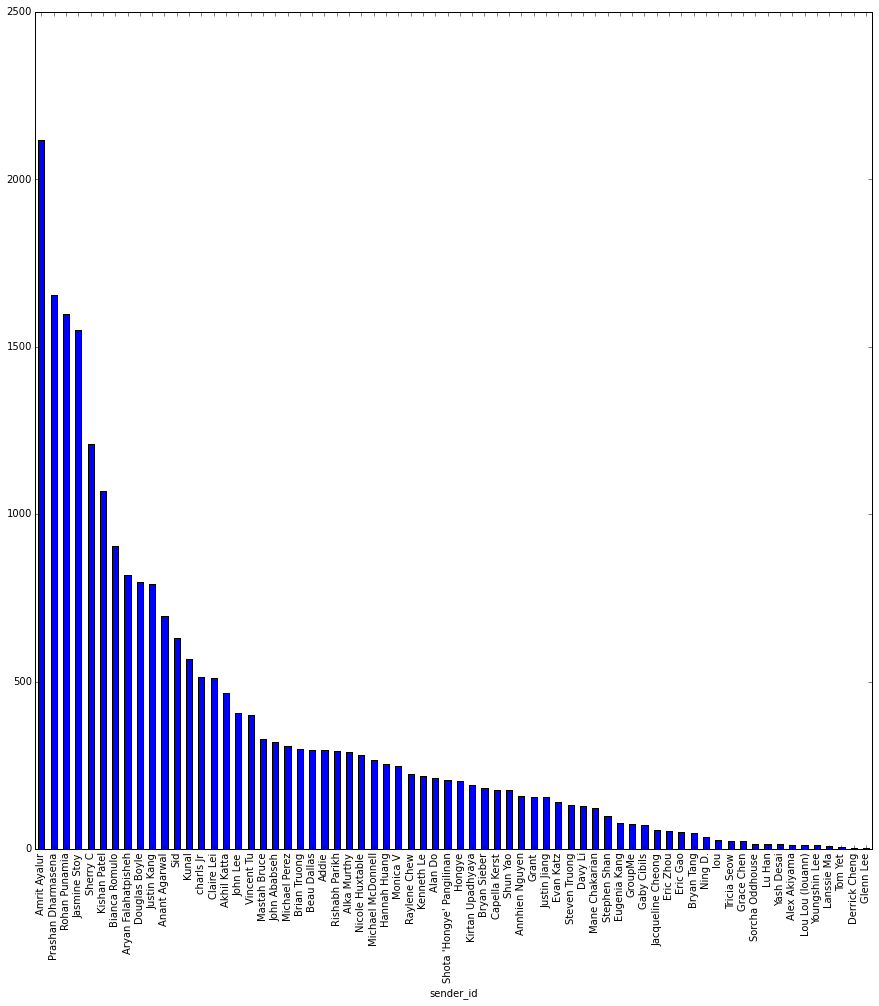

In [32]:
messages.groupby("sender_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

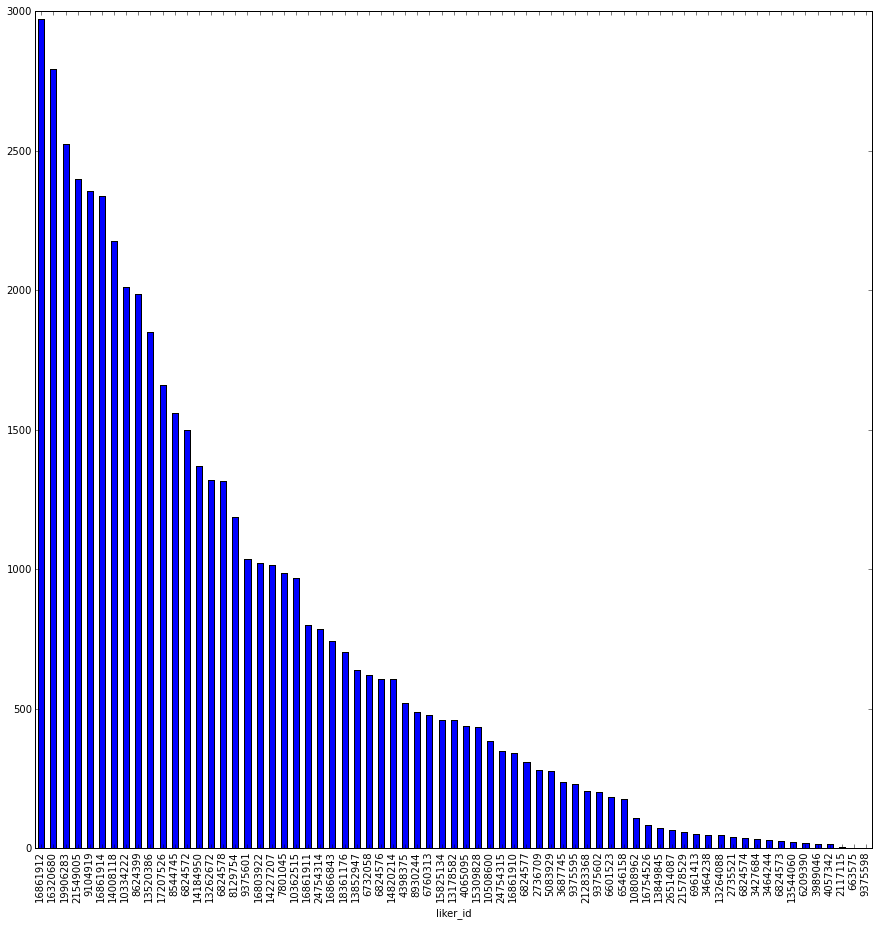

In [26]:
likes.groupby("liker_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

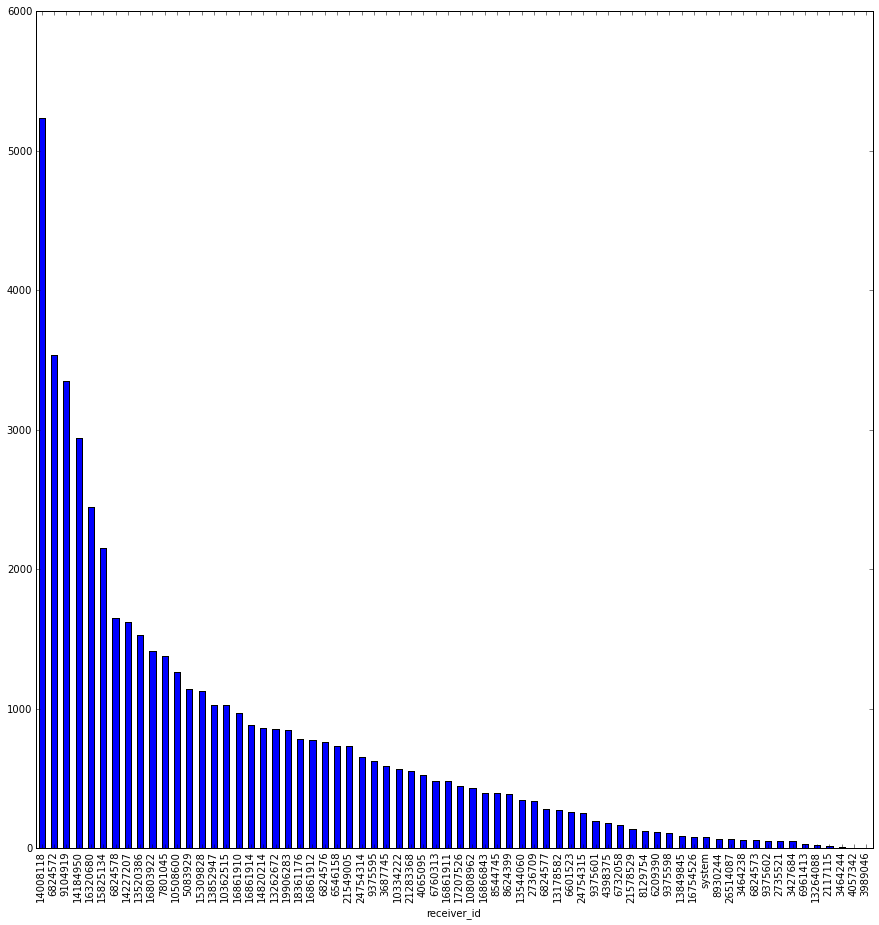

In [27]:
likes.groupby("receiver_id").size().sort_values(ascending=False).plot(kind="bar", figsize=(15,15))